<center>
    <h1>Identifying the Human Values behind Arguments</h1>
    <h1>01 - Dataset Analysis</h1>
    <h2>Natural Language Processing</h2>
    <h3>Antonio Politano, Enrico Pittini, Riccardo Spolaor and Samuele Bortolato</h3>
    <h4>antonio.politano2@studio.unibo.it, enrico.pittini@studio.unibo.it, riccardo.spolaor@studio.unibo.it, samuele.bortolato@studio.unibo.it</h4>
</center>

---

In this notebook the analysis on the datasets for the *Identifying the Human Values behind Arguments* task is addressed.

For more detailed informations about the used functions, look into the corresponding docstrings inside the python files, inside the `src` folder.

In [1]:
# Settings for autoreloading.

%load_ext autoreload
%autoreload 2

In [2]:
# Settings for reproducibility.

from src.utils.seeder import set_random_seed

SEED = 42
set_random_seed(SEED)

c:\Users\riccardo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download of the Dataset

In [3]:
from src.datasets.dataset_builder import get_dataframes

arguments_train_df, labels_train_df = get_dataframes('data', 'training')
arguments_test_df, labels_test_df = get_dataframes('data', 'validation')

In [4]:
print('Arguments dataframe structure:')
arguments_train_df.head()

Arguments dataframe structure:


,Conclusion,Stance,Premise,Labels
0,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,[Security: societal]
1,We should ban fast food,in favor of,fast food should be banned because it is reall...,[Security: personal]
2,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,"[Power: dominance, Security: societal]"
3,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,"[Security: societal, Conformity: rules, Univer..."
4,We should ban factory farming,against,factory farming allows for the production of c...,"[Security: personal, Benevolence: caring, Univ..."


In [5]:
print('Labels dataframe structure:')
labels_train_df.head()

Labels dataframe structure:


,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [6]:
print(f'Number of rows of the train dataframe: {len(arguments_train_df)}')
print(f'Number of rows of the test dataframe: {len(arguments_test_df)}')

Number of rows of the train dataframe: 5393
Number of rows of the test dataframe: 1896


In [7]:
TARGETS = labels_train_df.columns.to_list()

In [8]:
print(f'Number of classes: {len(TARGETS)}')

Number of classes: 20


In [9]:
from src.datasets.dataset_builder import split_dataframes

(arguments_train_df, labels_train_df), (arguments_val_df, labels_val_df) = \
    split_dataframes(arguments_train_df, labels_train_df, seed=SEED)

In [10]:
print('Number of rows of the train dataframe after splitting:',
      len(arguments_train_df))
print('Number of rows of the validation dataframe after splitting:',
      len(arguments_val_df))

Number of rows of the train dataframe after splitting: 4314
Number of rows of the validation dataframe after splitting: 1079


# Data Analysis

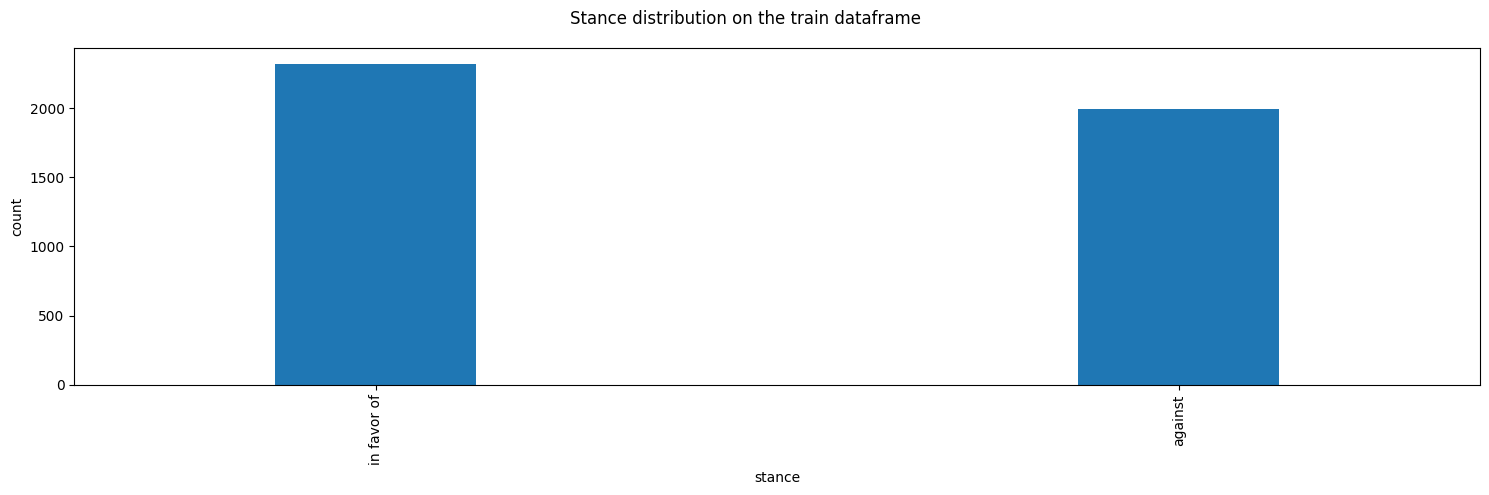

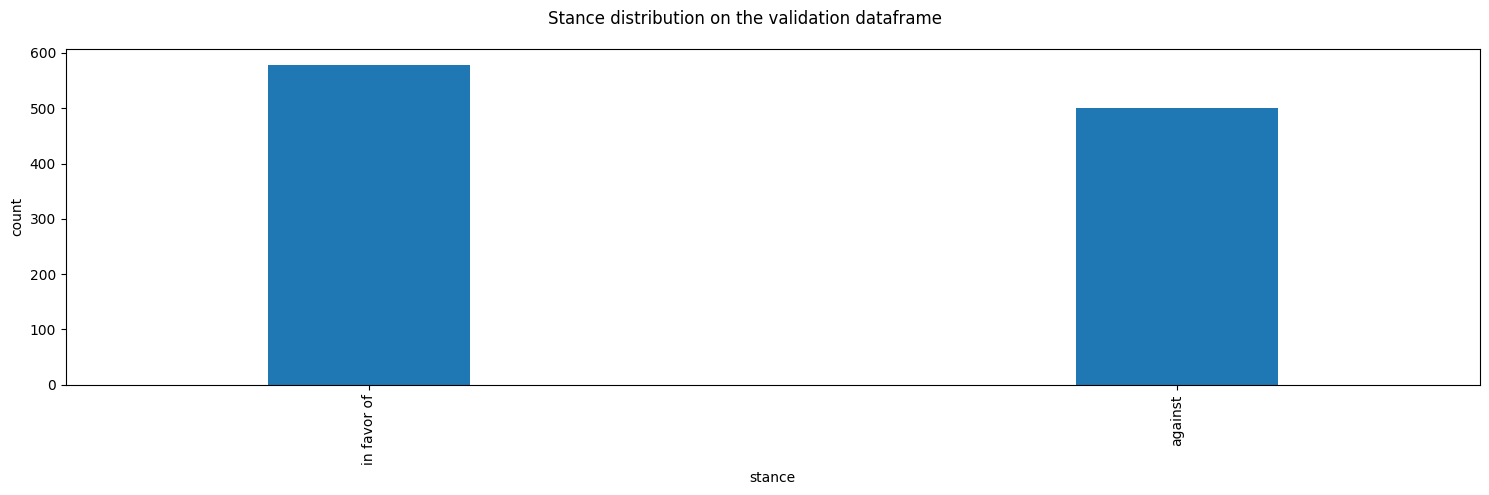

In [11]:
from src.datasets.dataset_analysis import plot_stance_distribution

plot_stance_distribution(arguments_train_df,
                         title='Stance distribution on the train dataframe')
plot_stance_distribution(
    arguments_val_df, title='Stance distribution on the validation dataframe')

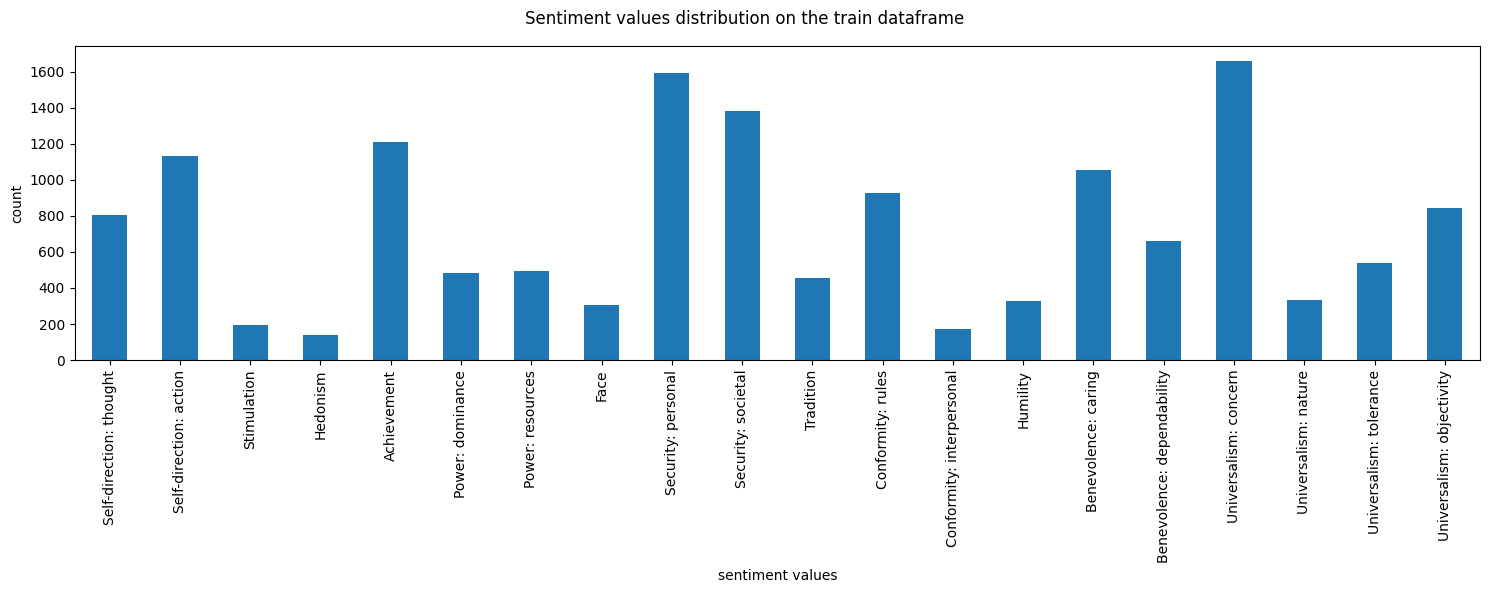

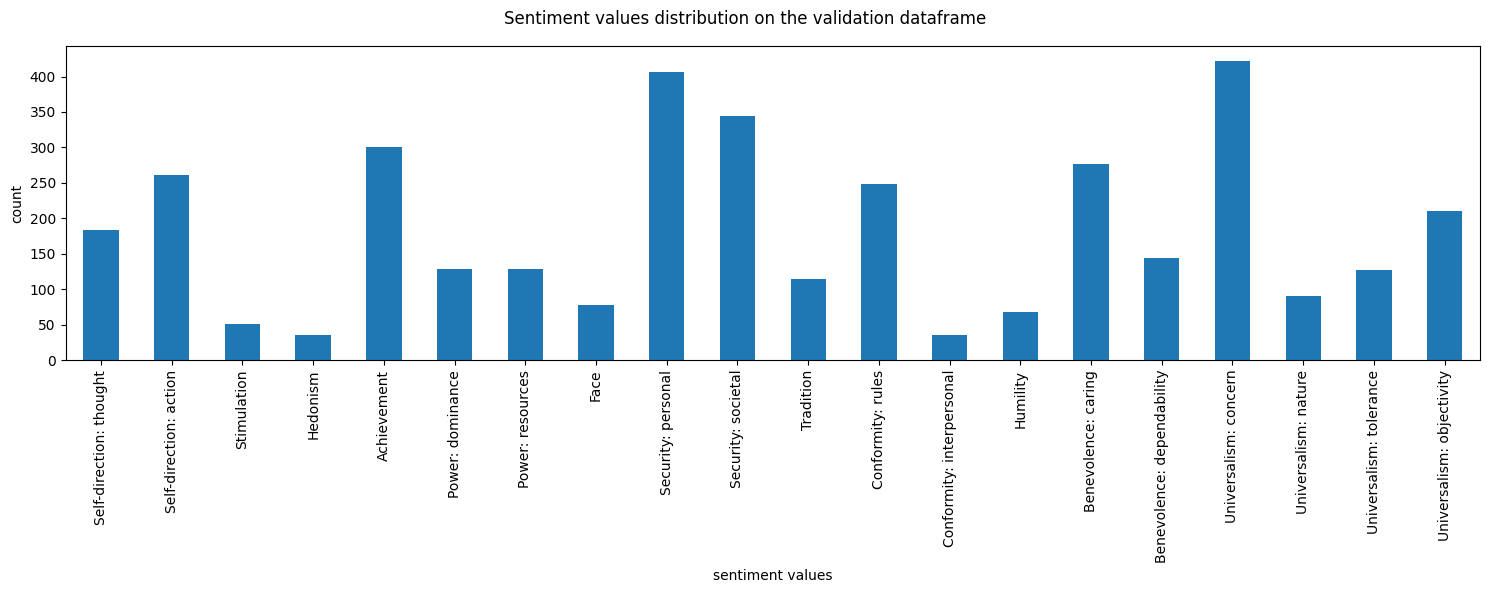

In [12]:
from src.datasets.dataset_analysis import plot_sentiment_distribution

plot_sentiment_distribution(
    labels_train_df,
    title='Sentiment values distribution on the train dataframe')
plot_sentiment_distribution(
    labels_val_df, 
    title='Sentiment values distribution on the validation dataframe')

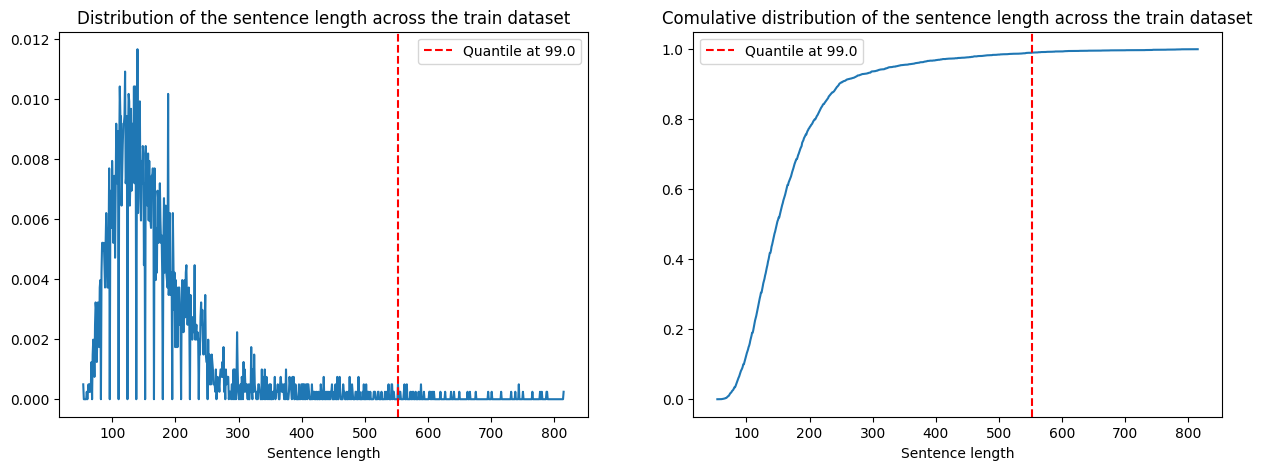

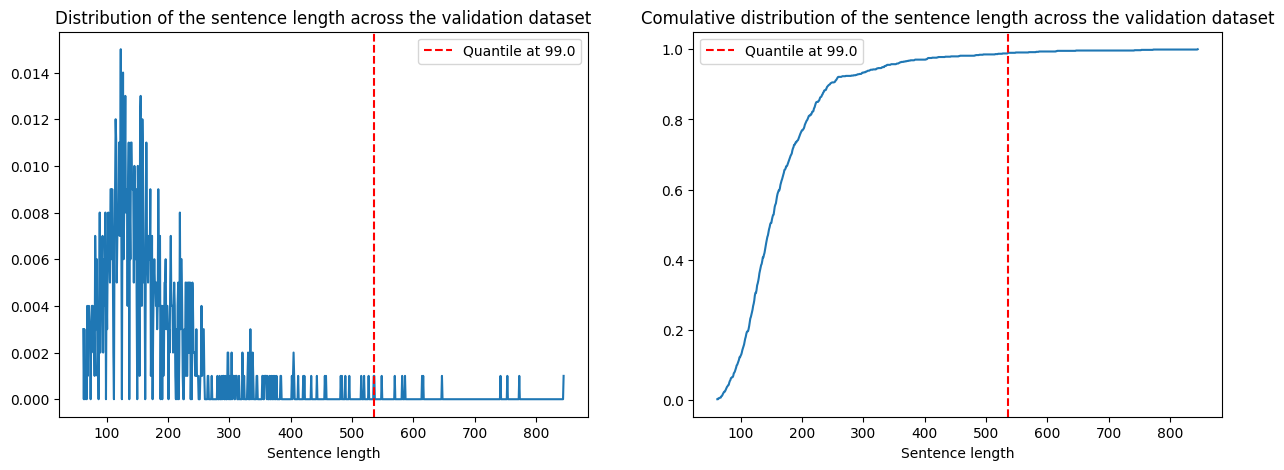

In [13]:
from src.datasets.dataset_analysis import plot_sequence_length_analysis

plot_sequence_length_analysis(arguments_train_df, df_name='train dataset',
                              percentile=.99)
plot_sequence_length_analysis(arguments_val_df, df_name='validation dataset',
                              percentile=.99)

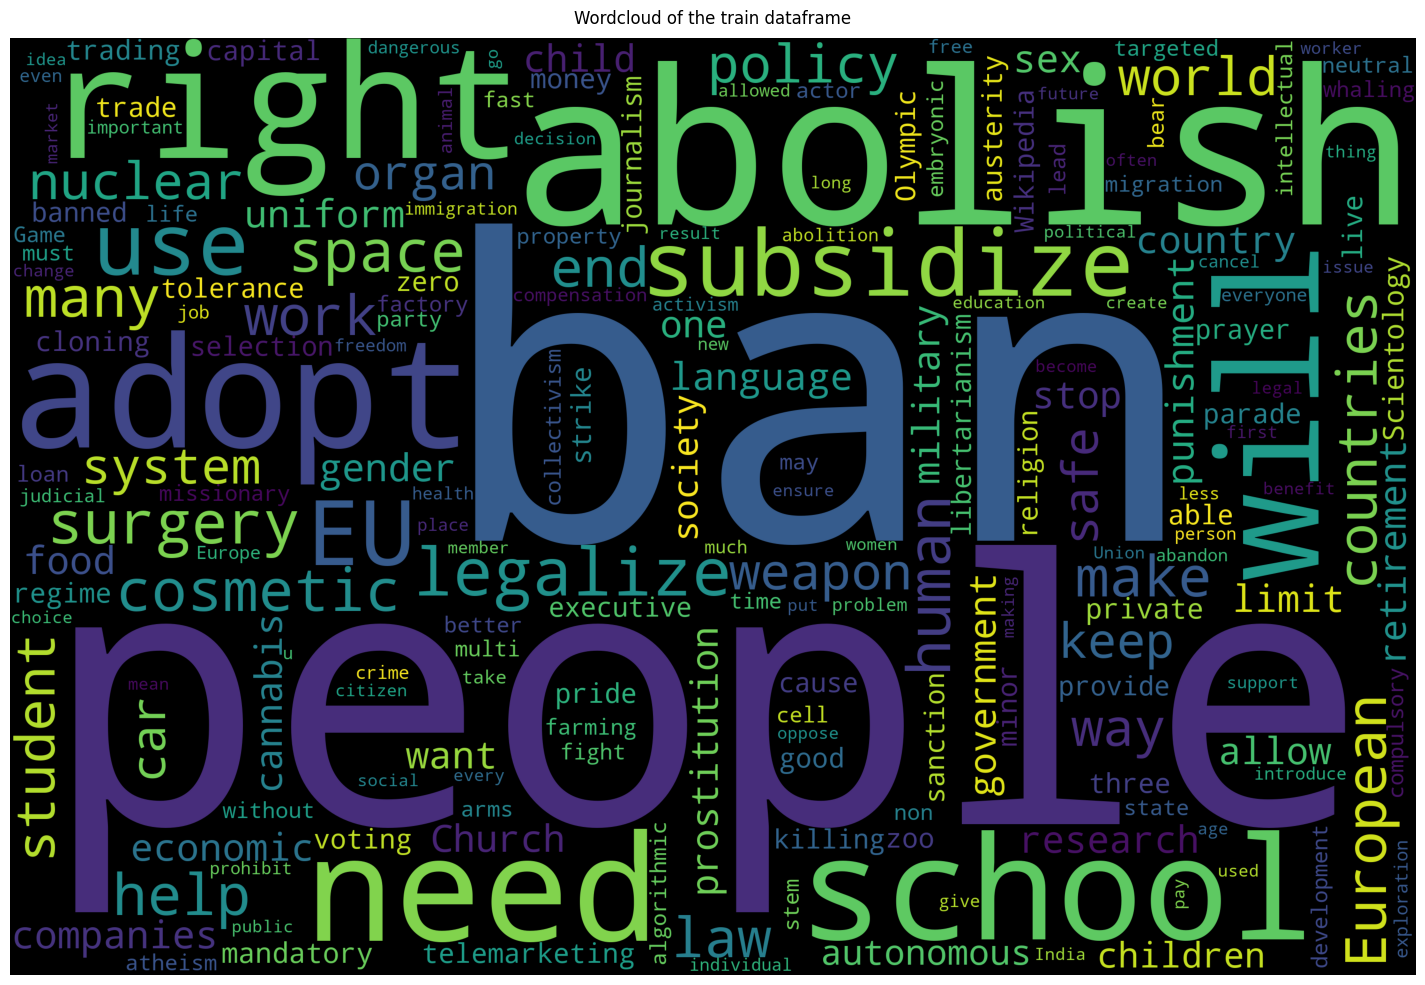

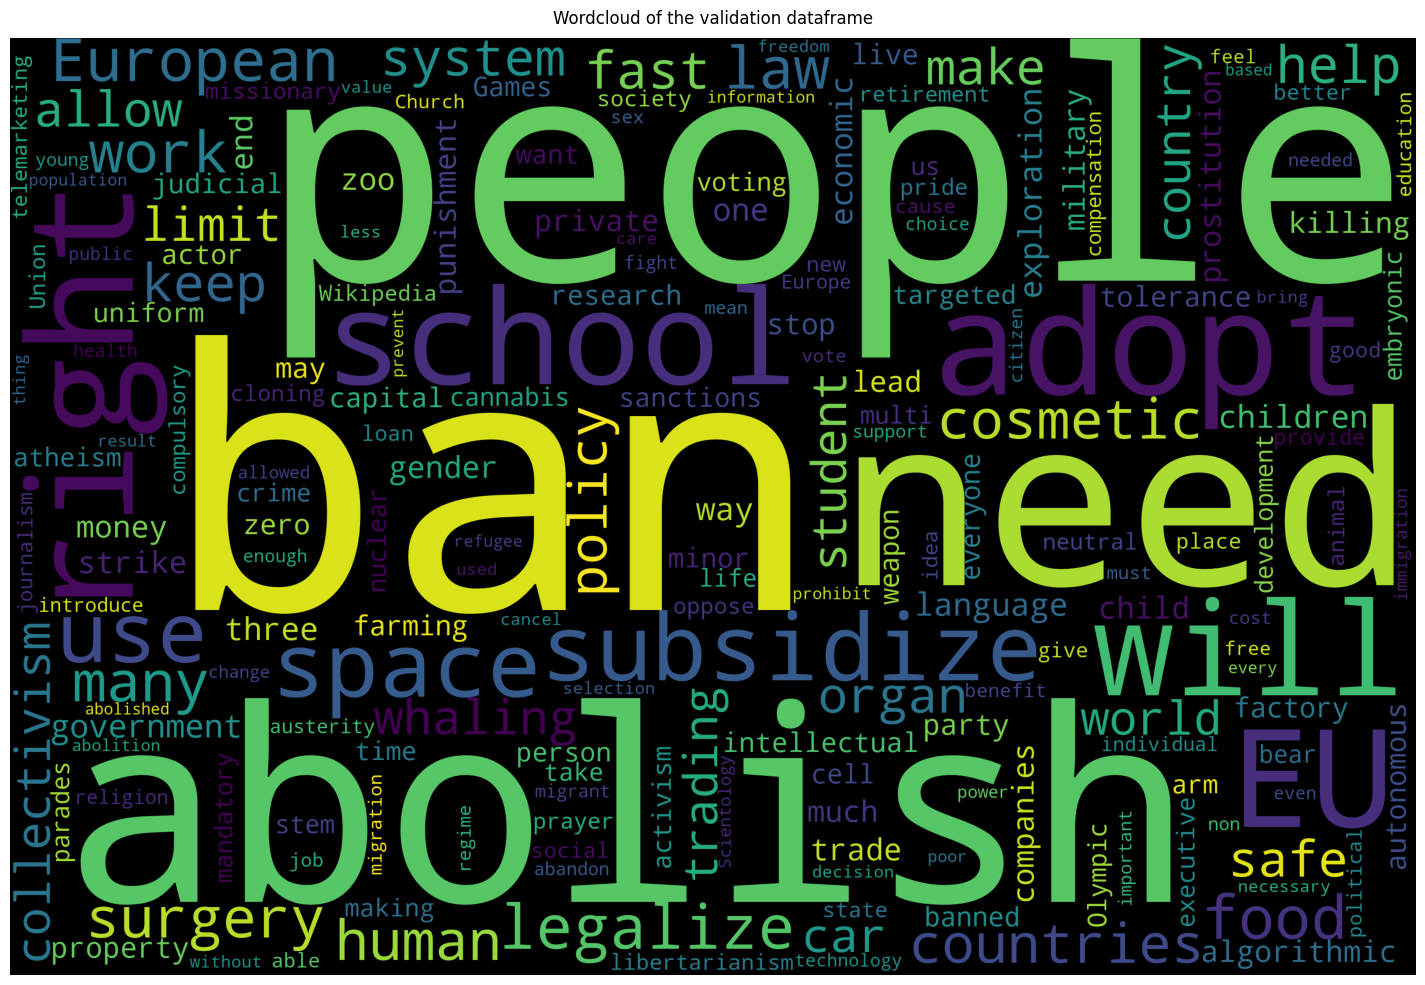

In [14]:
from src.datasets.dataset_analysis import plot_word_cloud

plot_word_cloud(arguments_train_df, title='Wordcloud of the train dataframe')
plot_word_cloud(arguments_val_df,
                title='Wordcloud of the validation dataframe')

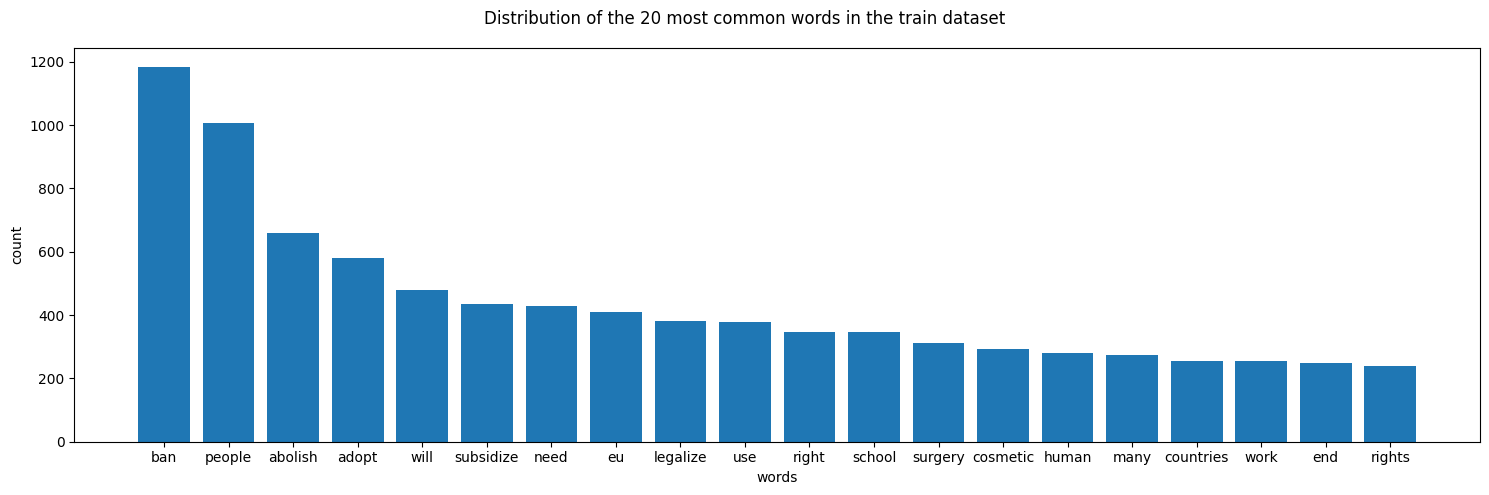

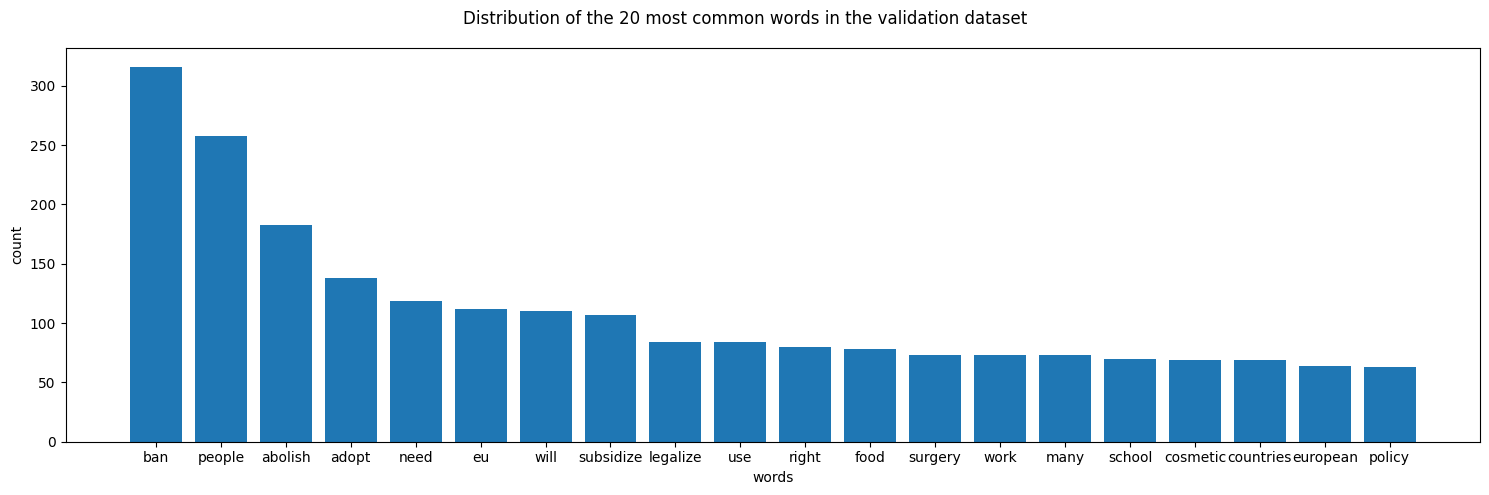

In [15]:
from src.datasets.dataset_analysis import plot_most_common_words_distribution

plot_most_common_words_distribution(
    arguments_train_df, n=20,
    title='Distribution of the 20 most common words in the train dataset')
plot_most_common_words_distribution(
    arguments_val_df, n=20,
    title='Distribution of the 20 most common words in the validation dataset')